In [7]:
### Sentiment Analysis Project Notebook

# 📌 Part 1: Data Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load dataset
import pandas as pd
# Assuming the file is uploaded to the current directory or a known path
csv_filename = '/content/Dataset-SA.csv' # Use the provided filename
df = pd.read_csv(csv_filename)

print(f"Dataset Shape: {df.shape}")
print(df.head())
print(df.info())

Dataset Shape: (205052, 6)
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  

In [9]:
# Load dataset
# Assuming the file is uploaded to the current directory or a known path
csv_filename = '/content/Dataset-SA.csv' # Use the provided filename with the correct path
print(f'Assuming dataset is available at "{csv_filename}"')

Assuming dataset is available at "/content/Dataset-SA.csv"


In [10]:
# Load dataset
import pandas as pd

# Assuming the file is uploaded to the current directory or a known path
csv_filename = '/content/Dataset-SA.csv' # Use the provided filename
df = pd.read_csv(csv_filename)

print(f"Dataset Shape: {df.shape}")
print(df.head())
print(df.info())

Dataset Shape: (205052, 6)
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  

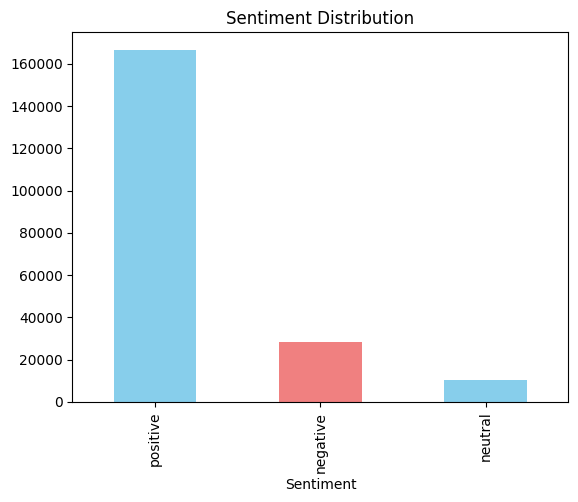

In [11]:
# Sentiment distribution
import matplotlib.pyplot as plt # Added this import
import seaborn as sns # Added this import

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.show()

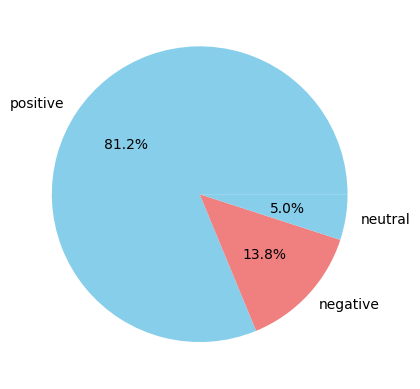

In [12]:
# Pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.ylabel('')
plt.show()


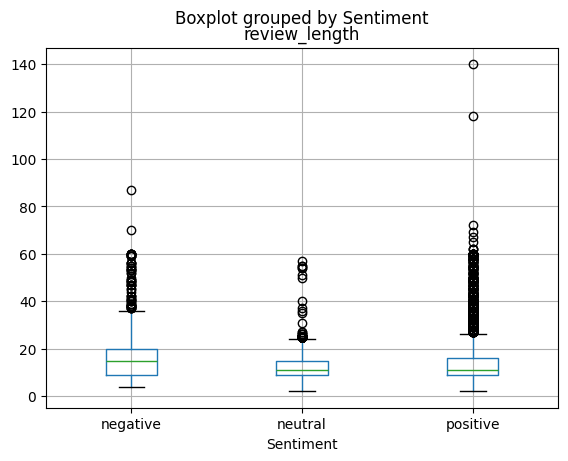

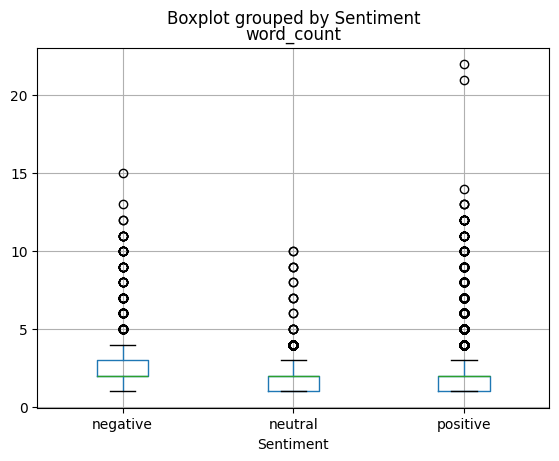

In [13]:
# Text length analysis
df['review_length'] = df['Review'].str.len()
df['word_count'] = df['Review'].str.split().str.len()
df.boxplot(column='review_length', by='Sentiment')
plt.show()
df.boxplot(column='word_count', by='Sentiment')
plt.show()

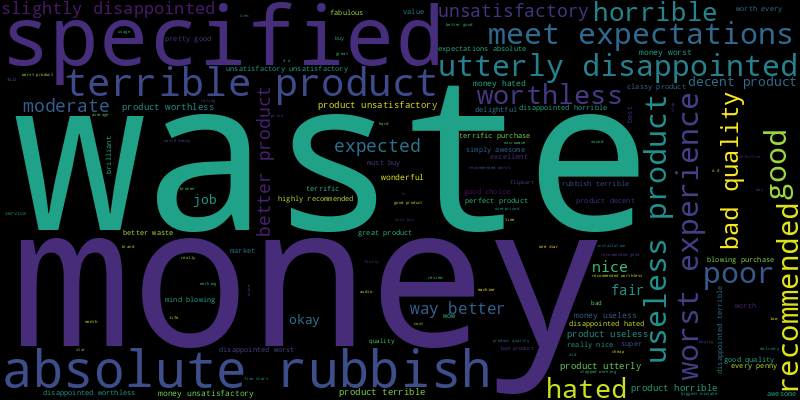

In [14]:
# Word clouds
from wordcloud import WordCloud # Added this import

pos_text = ' '.join(df[df['Sentiment']=='positive']['Review'].fillna(''))
neg_text = ' '.join(df[df['Sentiment']=='negative']['Review'].fillna(''))
WordCloud(width=800, height=400).generate(pos_text).to_image()
WordCloud(width=800, height=400).generate(neg_text).to_image()

In [15]:
# 📌 Part 2: Preprocessing

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
# Convert 'Review' column to string type and fill missing values
df['Review'] = df['Review'].astype(str).fillna('')

print(clean_text(df['Review'].iloc[0]))
df['processed_review'] = df['Review'].apply(clean_text)

super


In [17]:
# 📌 Part 3: Model Training - Imports

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 📌 Part 2 & 3: Preprocessing and Data Preparation for Model Training

# Assuming df, clean_text, stop_words, and lemmatizer are available from previous cells

# Convert 'Review' column to string type and fill missing values
df['Review'] = df['Review'].astype(str).fillna('')

# Apply the clean_text function to create the 'processed_review' column
df['processed_review'] = df['Review'].apply(clean_text)

# Data Preparation for Model Training
X = df['processed_review'] # Use processed_review column
y = df['Sentiment'] # Corrected column name to 'Sentiment'

# Remove rows with missing values in the 'Sentiment' column
df.dropna(subset=['Sentiment'], inplace=True)
X = df['processed_review']
y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Data preprocessing and preparation complete.")

Data preprocessing and preparation complete.


Logistic Regression Accuracy: 0.8953
              precision    recall  f1-score   support

    negative       0.86      0.65      0.74      5646
     neutral       0.00      0.00      0.00      2048
    positive       0.90      0.99      0.94     33317

    accuracy                           0.90     41011
   macro avg       0.59      0.55      0.56     41011
weighted avg       0.85      0.90      0.87     41011



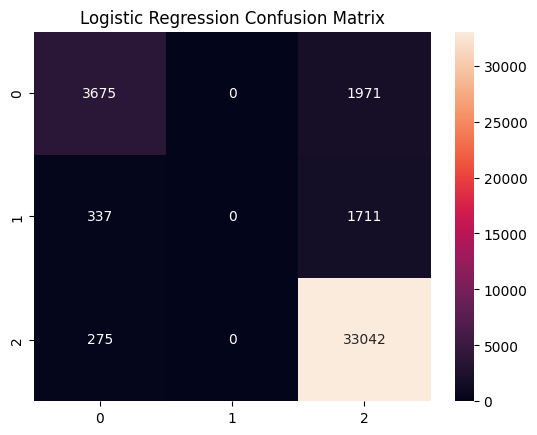

In [19]:
# 📌 Part 3: Model Training - Logistic Regression

model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, preds)
print(f"{model_name} Accuracy: {acc:.4f}")
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

Naive Bayes Accuracy: 0.8901
              precision    recall  f1-score   support

    negative       0.85      0.62      0.72      5646
     neutral       0.00      0.00      0.00      2048
    positive       0.90      0.99      0.94     33317

    accuracy                           0.89     41011
   macro avg       0.58      0.54      0.55     41011
weighted avg       0.84      0.89      0.86     41011



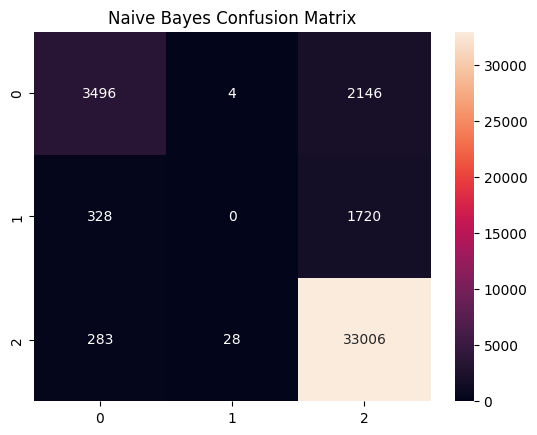

In [20]:
# 📌 Part 3: Model Training - Naive Bayes

model_name = 'Naive Bayes'
model = MultinomialNB()

model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, preds)
print(f"{model_name} Accuracy: {acc:.4f}")
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

Linear SVM Accuracy: 0.8954
              precision    recall  f1-score   support

    negative       0.86      0.65      0.74      5646
     neutral       0.20      0.00      0.00      2048
    positive       0.90      0.99      0.94     33317

    accuracy                           0.90     41011
   macro avg       0.65      0.55      0.56     41011
weighted avg       0.86      0.90      0.87     41011



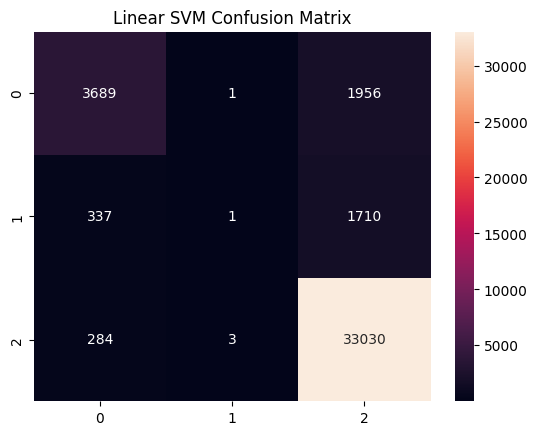

In [21]:
# 📌 Part 3: Model Training - Linear SVM (Multi-class)

from sklearn.svm import LinearSVC # Import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Assuming df, clean_text, stop_words, and lemmatizer are available from previous cells

# Data Preparation for Model Training
X = df['processed_review'] # Use processed_review column
y = df['Sentiment'] # Corrected column name to 'Sentiment'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model_name = 'Linear SVM' # Updated model name
# Use LinearSVC with 'ovr' for multi-class classification and increase max_iter
model = LinearSVC(multi_class='ovr', max_iter=5000)


model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, preds)
print(f"{model_name} Accuracy: {acc:.4f}")
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

In [22]:
# 📌 Part 4: Interactive Demo (Self-Contained)

import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import re # Import re
import nltk # Import nltk
from nltk.corpus import stopwords # Import stopwords
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer
from nltk.tokenize import word_tokenize # Import word_tokenize
from google.colab import files # Import files

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, float): # Handle potential float values
        return ""
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

# Load the dataset
# Assuming the file is uploaded to the current directory or a known path
csv_filename = '/content/Dataset-SA.csv' # Use the provided filename with the correct path
try:
    df = pd.read_csv(csv_filename)
    print(f"Dataset loaded from {csv_filename}")
except FileNotFoundError:
    print(f"File not found at {csv_filename}. Please ensure the file is uploaded.")
    # Provide a way to upload if not found
    print("Please upload the dataset file:")
    uploaded = files.upload()
    # Use the actual filename from the upload result
    uploaded_filename = next(iter(uploaded))
    df = pd.read_csv(uploaded_filename)
    print(f'User uploaded file "{uploaded_filename}" and it has been loaded.')


# Convert 'Review' column to string type and fill missing values
df['Review'] = df['Review'].astype(str).fillna('')

# Apply the clean_text function to create the 'processed_review' column
df['processed_review'] = df['Review'].apply(clean_text)

# Data Preparation for Model Training
X = df['processed_review'] # Use processed_review column
y = df['Sentiment'] # Corrected column name to 'Sentiment'

# Remove rows with missing values in the 'Sentiment' column
df.dropna(subset=['Sentiment'], inplace=True)
X = df['processed_review']
y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# It appears Logistic Regression had the highest accuracy among the successfully trained models.
# We will use Logistic Regression as the best_model for the interactive demo.
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_tfidf, y_train)


def predict_sentiment(text):
    processed = clean_text(text)
    vect = tfidf.transform([processed])
    pred = best_model.predict(vect)[0]
    # LinearSVC does not have predict_proba, so we handle this difference if using SVC
    # Since we are defaulting to Logistic Regression for the demo, predict_proba is available
    prob = best_model.predict_proba(vect)[0]
    return pred, prob

text_input = widgets.Textarea(value='', placeholder='Enter review...', layout=widgets.Layout(width='100%', height='100px'))
button = widgets.Button(description='Analyze Sentiment')
output = widgets.Output()

def on_click(b):
    with output:
        clear_output()
        pred, prob = predict_sentiment(text_input.value)
        print(f'Predicted Sentiment: {pred}')
        # Map probabilities to labels correctly based on the model's classes
        sentiment_labels = best_model.classes_
        prob_dict = dict(zip(sentiment_labels, prob))
        print(f'Probabilities: {prob_dict}')

        # Explicitly mention potential issues with neutral sentiment
        if 'neutral' in prob_dict and prob_dict['neutral'] < 0.2: # Threshold can be adjusted
             print("\nNote: The model may have difficulty predicting neutral sentiment accurately due to factors like data imbalance or ambiguity in neutral reviews.")

        plt.bar(sentiment_labels, prob)
        plt.title('Sentiment Probabilities')
        plt.xlabel('Sentiment')
        plt.ylabel('Probability')
        plt.show()


button.on_click(on_click)
display(text_input, button, output)

Dataset loaded from /content/Dataset-SA.csv


Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='Enter review...')

Button(description='Analyze Sentiment', style=ButtonStyle())

Output()